# 142.环形链表II

[力扣题目链接](https://leetcode.cn/problems/linked-list-cycle-ii/)

题意： 给定一个链表，返回链表开始入环的第一个节点。 如果链表无环，则返回 null。

为了表示给定链表中的环，使用整数 pos 来表示链表尾连接到链表中的位置（索引从 0 开始）。 如果 pos 是 -1，则在该链表中没有环。

**说明**：不允许修改给定的链表。

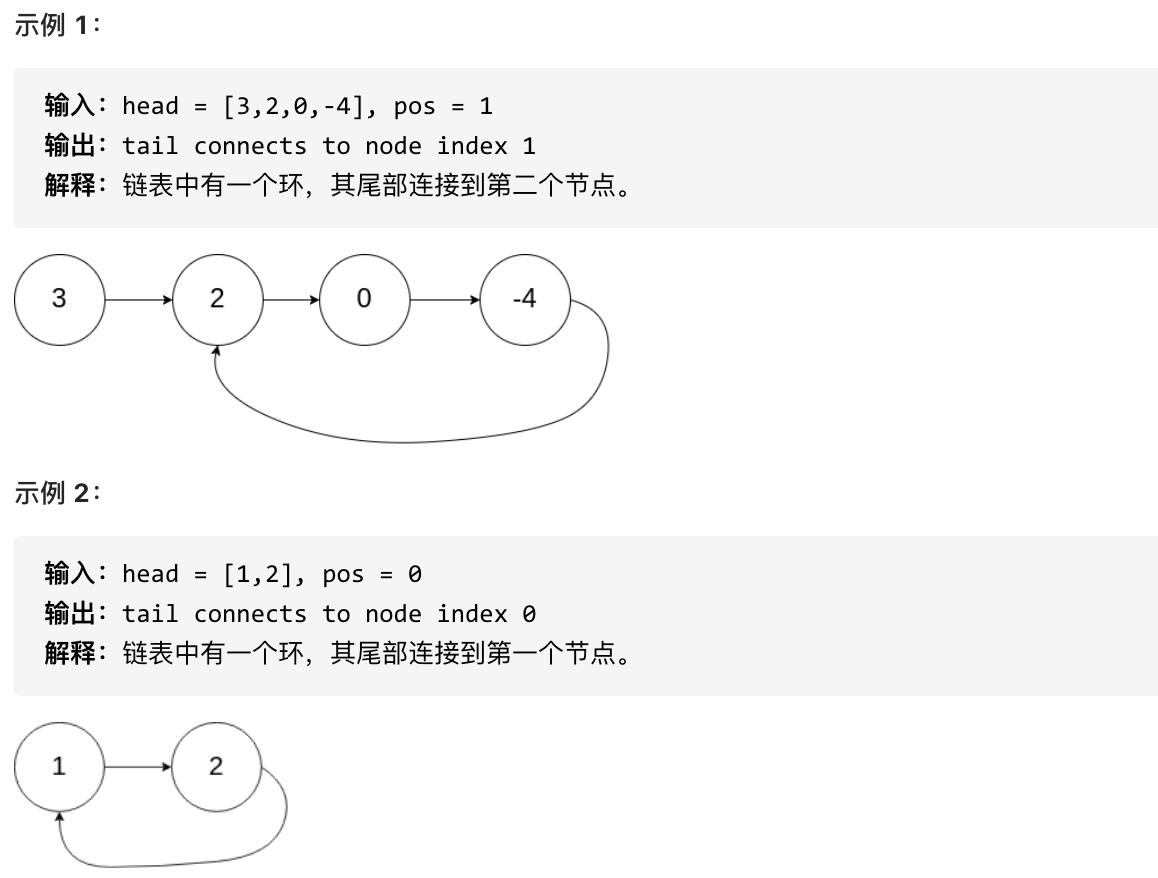

## 思路

该题用快慢指针来做，快慢指针都从head出发，slow每次移动1步，fast每次移动2步

- fast和slow会在环内相遇，如果没有环则用 `while fast and fast.next:`判定

- 我们要找出环的入口

假设：
- 起点到环入口距离为$x$
- 环入口到相遇点距离为$y$
- 相遇点再走到环入口距离为$z$

相遇时：
- slow走过$x + y$
- fast走过$x + y +n(y+z)$($n$是快指针绕的圈数)
- 因为fast的速度是slow的两倍，所以 : $2(x+y)=x+y+n(y+z)$
- 化简得到: $x = (n-1)(y+z)+z$

**这个公式意味着**：从起点出发走 $x$ 步，和从相遇点出发绕几圈再走 $z$ 步，最终都会停在**环的入口**！

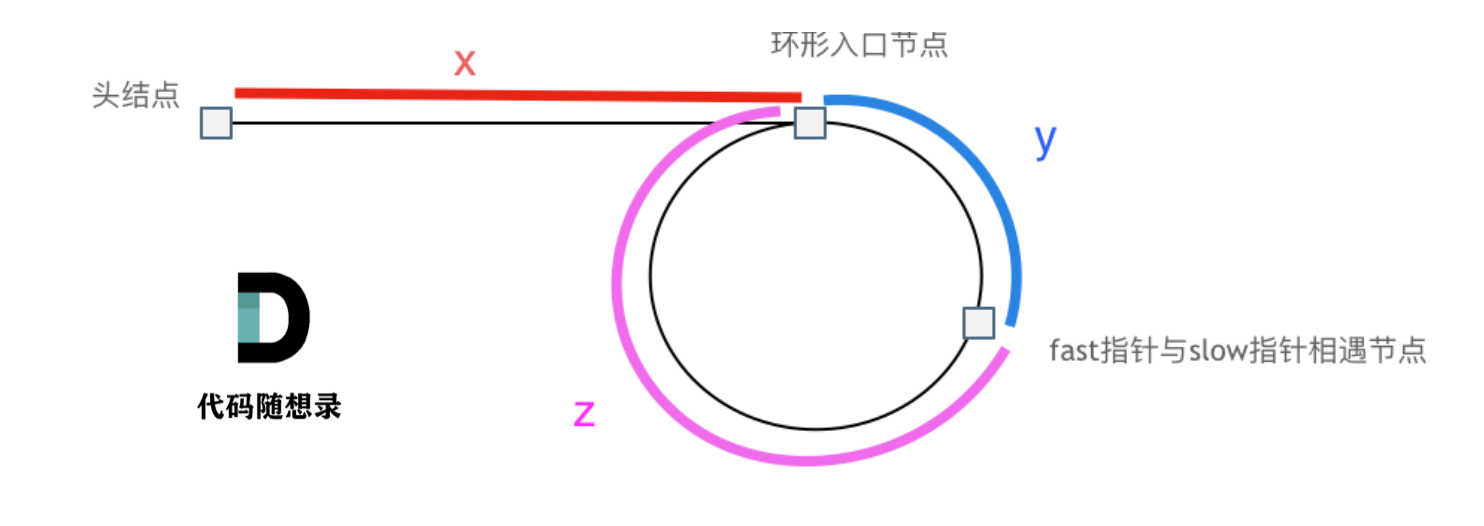

所以我们将此题目分为两部分：
1. 找到相遇节点，判定有环
2. 再从头节点和相遇节点分别出发一个指针，这两个指针相遇的节点就是环入口节点

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def detectCycle(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        fast = head
        slow = head

        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next

            if slow == fast:

                index1 = head
                index2 = slow 

                while index1 != index2:
                    index1 = index1.next
                    index2 = index2.next

                return index1
        #如果 fast 走到尽头，说明无环。
        return None